In [ ]:
import warnings
warnings.filterwanings('ignore')

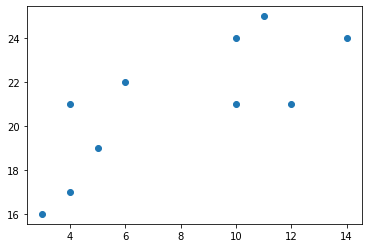

In [1]:
import matplotlib.pyplot as plt
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]

plt.scatter(x, y)
plt.show()

C:\Users\jyk42\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


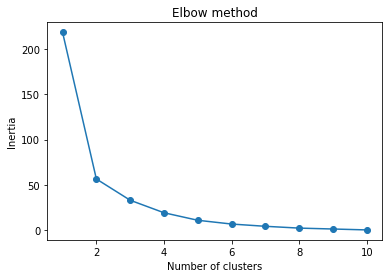

In [4]:
from sklearn.cluster import KMeans
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

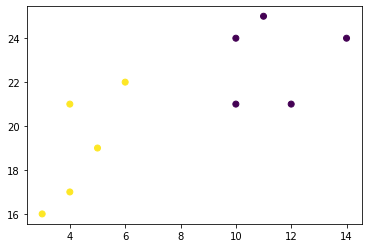

In [5]:
kmeans = KMeans(n_clusters =2)
kmeans.fit(data)
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [7]:
import pandas as pd
import math

retail_df = pd.read_excel('Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#데이터 전처리
retail_df = retail_df[retail_df['Quantity']>0] #0보다 큰애들만 다시 저장
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()] #notnull인것만 추리기

In [10]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [11]:
retail_df.isnull().sum()  #null이 있는지 없는지 확인

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
retail_df.drop_duplicates(inplace=True)
retail_df.shape

(392692, 8)

In [13]:
pd.DataFrame([{'product': len(retail_df['StockCode'].value_counts()), 'Transaction' : len(retail_df['InvoiceNo'].value_counts()),'Customer':len(retail_df['CustomerID'].value_counts())}],columns = ['Product', 'Transaction', 'Customer'], index = ['counts'])

,Product,Transaction,Customer
counts,NaN,18532,4338


In [15]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [16]:
retail_df['SaleAmount'] = retail_df['UnitPrice']*retail_df['Quantity']

In [23]:
aggregations = {
    'InvoiceNo' : 'count',  #customer ID별로 함수 적용 
    'SaleAmount' : 'sum',
    'InvoiceDate': 'max'
}

customer_df = retail_df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()

customer_df

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [26]:
customer_df = customer_df.rename(columns = {'InvoiceNo': 'Freq', 'InvoiceDate': 'ElapsedDays'})
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00
...,...,...,...,...
4333,18280,10,180.60,2011-03-07 09:52:00
4334,18281,7,80.82,2011-06-12 10:53:00
4335,18282,12,178.05,2011-12-02 11:43:00
4336,18283,721,2045.53,2011-12-06 12:02:00


In [30]:
import datetime

customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,ElapseDays
0,12346,1,77183.60,325 days 13:59:00,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00,310 days 07:59:00
...,...,...,...,...,...
4333,18280,10,180.60,277 days 14:08:00,277 days 14:08:00
4334,18281,7,80.82,180 days 13:07:00,180 days 13:07:00
4335,18282,12,178.05,7 days 12:17:00,7 days 12:17:00
4336,18283,721,2045.53,3 days 11:58:00,3 days 11:58:00


In [44]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   CustomerID      4338 non-null   int64          
 1   Freq            4338 non-null   int64          
 2   SaleAmount      4338 non-null   float64        
 3   ElapsedDays     4338 non-null   int64          
 4   ElapseDays      4338 non-null   timedelta64[ns]
 5   Freq_log        4338 non-null   float64        
 6   SaleAbount_log  4338 non-null   float64        
 7   ElapseDays_log  4338 non-null   float64        
 8   Freq_1og        4338 non-null   float64        
 9   SaleAbount_1og  4338 non-null   float64        
 10  ElapseDays_1og  4338 non-null   float64        
dtypes: float64(7), int64(3), timedelta64[ns](1)
memory usage: 372.9 KB


In [45]:
customer_df['ElapseDays'] = customer_df['ElapseDays'].apply(lambda x: x.days+1)
customer_df

,CustomerID,Freq,SaleAmount,ElapsedDays,ElapseDays,Freq_log,SaleAbount_log,ElapseDays_log,Freq_1og,SaleAbount_1og,ElapseDays_1og
0,12346,1,77183.60,326,326,0.693147,11.253955,5.789960,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,3,5.209486,8.368925,1.386294,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,76,3.465736,7.494564,4.343805,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,19,4.304065,7.472245,2.995732,4.304065,7.472245,2.995732
4,12350,17,334.40,311,311,2.890372,5.815324,5.743003,2.890372,5.815324,5.743003
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,10,180.60,278,278,2.397895,5.201806,5.631212,2.397895,5.201806,5.631212
4334,18281,7,80.82,181,181,2.079442,4.404522,5.204007,2.079442,4.404522,5.204007
4335,18282,12,178.05,8,8,2.564949,5.187665,2.197225,2.564949,5.187665,2.197225
4336,18283,721,2045.53,4,4,6.582025,7.623901,1.609438,6.582025,7.623901,1.609438


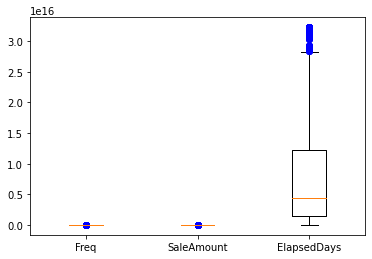

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapseDays']],sym='bo')

plt.xticks([1,2,3], ['Freq', 'SaleAmount', 'ElapsedDays'])

plt.show()

In [39]:
import numpy as np

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAbount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapseDays_log'] = np.log1p(customer_df['ElapsedDays'])

customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']]

KeyError: "['SaleAmount_log', 'ElapsedDays_log'] not in index"